Start by loading dependencies.

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec

Set settings from backtesting file.

In [2]:
alpha = 5
oneQuarter = 63
trainingSizes = [oneQuarter, 2*oneQuarter, 3*oneQuarter, 4*oneQuarter, 8*oneQuarter]
nModels = 2
nStatistics = 21
nRebalances = 87
nTrainings = len(trainingSizes)
nTrajectories = 4

Specify settings for plots.

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})
myMap = plt.get_cmap('inferno') # Paired, inferno

Specify relative path.

In [4]:
relativePath = "./Results/Backtest/ITM/"

Specify id's.

In [5]:
idRecording = 2

Load dates for rebalances and portfolio paths.

In [6]:
rebalanceDates = pd.read_csv(relativePath + "RebalanceDates.csv")
trajectoryDates = pd.read_csv(relativePath + "TrajectoryDates.csv")

Then load files.

In [7]:
# Load optimal Wasserstein radii
fileNameEps = "id{}_Backtest_ITM_epsOpt_Experiment1.csv".format(idRecording)
filePathEps = relativePath + fileNameEps
epsOpt = np.loadtxt(filePathEps).reshape((nTrainings, nRebalances))

# Load trajectories of portfolios
fileNameTrajectories = "id{}_Backtest_ITM_trajectories_Experiment1.csv".format(idRecording)
filePathTrajectories = relativePath + fileNameTrajectories
trajectories = np.loadtxt(filePathTrajectories).reshape((nTrainings, len(trajectoryDates), nTrajectories))

# Load in-sample statistics
fileNameInSample = "id{}_Backtest_ITM_IS_statistics_Experiment1.csv".format(idRecording)
filePathInSample = relativePath + fileNameInSample
IS_statistics = np.loadtxt(filePathInSample).reshape((nModels, nTrainings, nRebalances, nStatistics))

# Load out-of-sample statistics
fileNameOutOfSample = "id{}_Backtest_ITM_OoS_statistics_Experiment1.csv".format(idRecording)
filePathOutOfSample = relativePath + fileNameOutOfSample
OoS_statistics = np.loadtxt(filePathOutOfSample).reshape((nModels, nTrainings, nRebalances, nStatistics))

### Plots of Trajectories for Overview

In [8]:
cumulativeReturns = (np.cumprod(trajectories, axis=1) - 1) * 100
trajectoryDates = np.array(trajectoryDates['Dates'], dtype=np.datetime64)
rebalanceDates = np.array(rebalanceDates['Dates'], dtype=np.datetime64)
compatableDates = trajectoryDates

Construct a new array to hold the excess return trajectories.

In [9]:
excessResultsSAA = cumulativeReturns[:,:,2] - cumulativeReturns[:,:,1]
excessResultsDRO = cumulativeReturns[:,:,3] - cumulativeReturns[:,:,1]

Then we construct the actual plots.

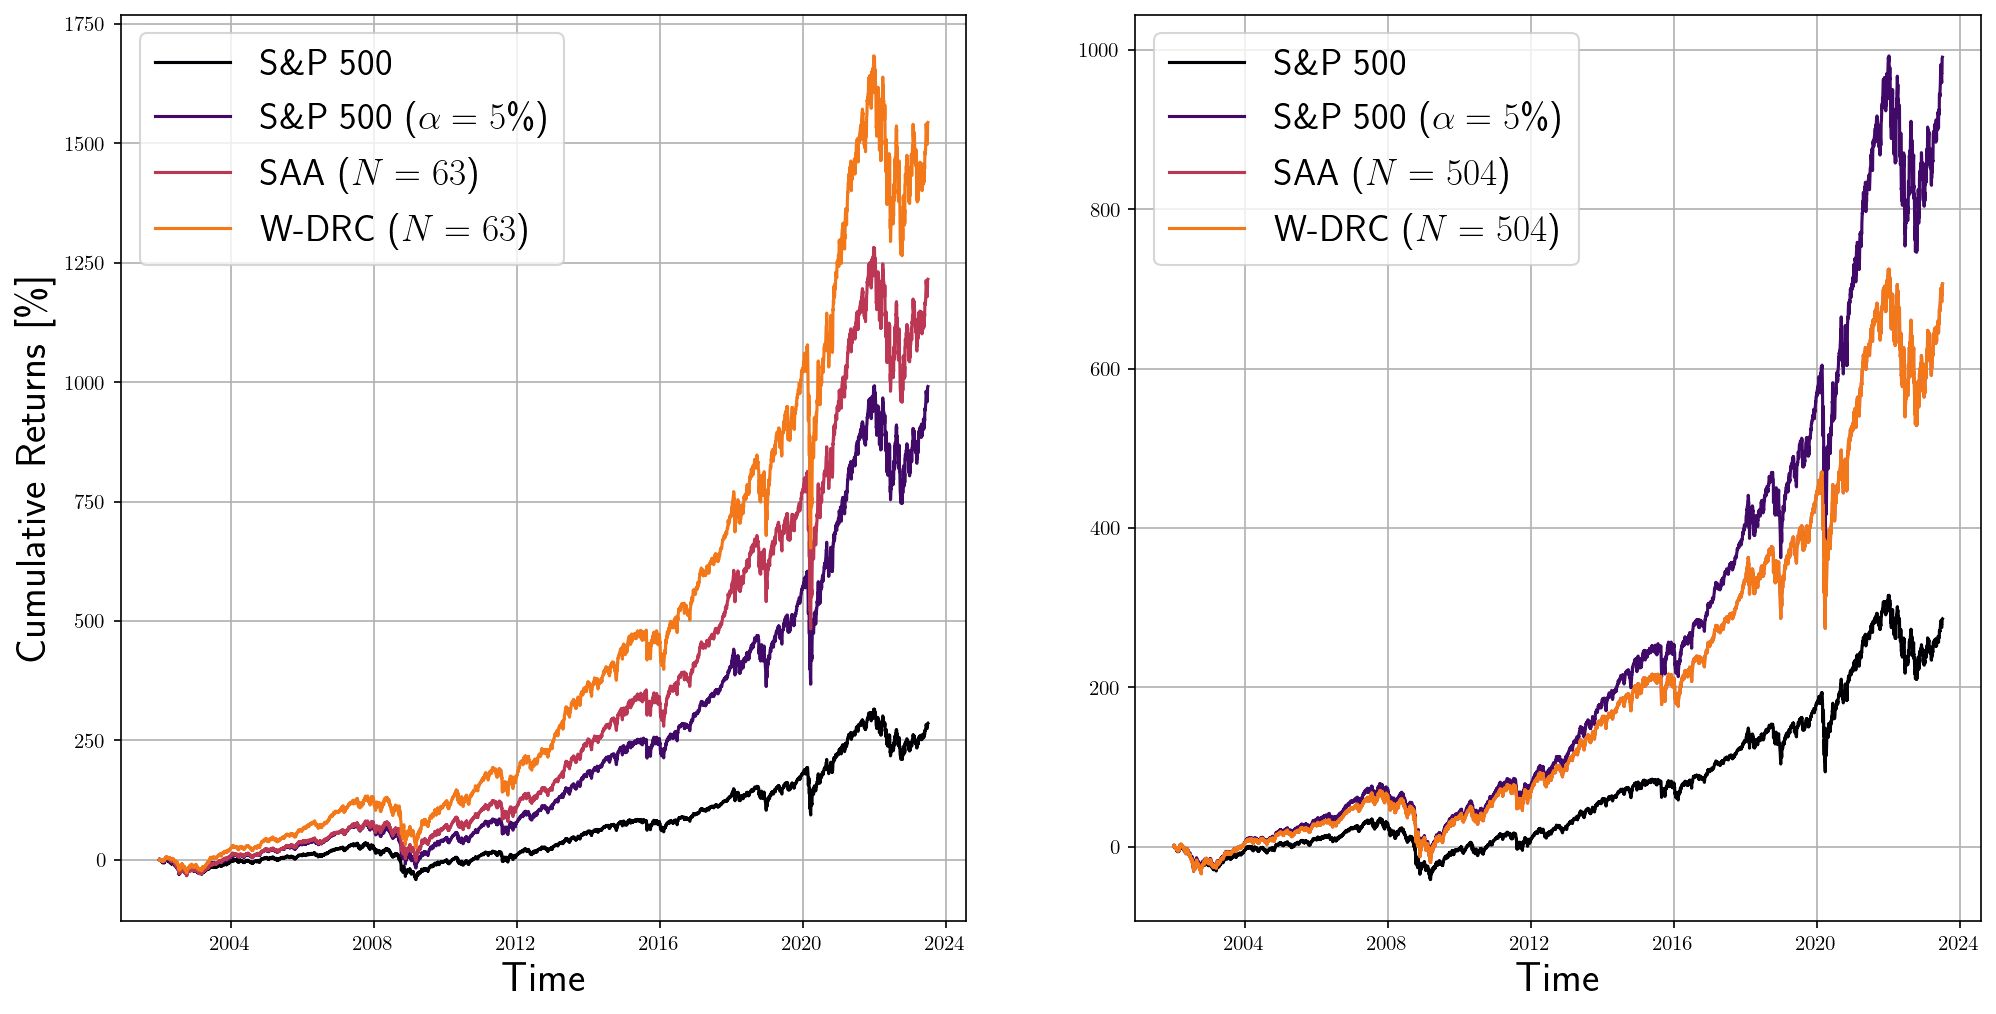

In [10]:
# Prepare plot settings
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Control settings
xlabel=r'Time'
ylabel=r'Cumulative Returns [\%]'
legend_loc="upper left"

# Prepare plots using gridspec
fig = plt.figure(figsize=(16, 8), dpi=150)
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1, 1])

# Specify which sample size to plot for
TX = 0
selectedSize = trainingSizes[TX]

# Plot
ax1 = plt.subplot(gs[0, 0])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500', color=myMap(0.0))
ax1.plot(compatableDates, cumulativeReturns[TX,:,1] , label=r'S\&P 500 ($\alpha = 5$\%)', color=myMap(0.2))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 4
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 1])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500', color=myMap(0.0))
ax1.plot(compatableDates, cumulativeReturns[TX,:,1] , label=r'S\&P 500 ($\alpha = 5$\%)', color=myMap(0.2))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel("", fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = f'Backtest_ITMDRO_Fig1_CUMULATIVE_TWO.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

Then we will make a combined plot that can be put into the appendix.

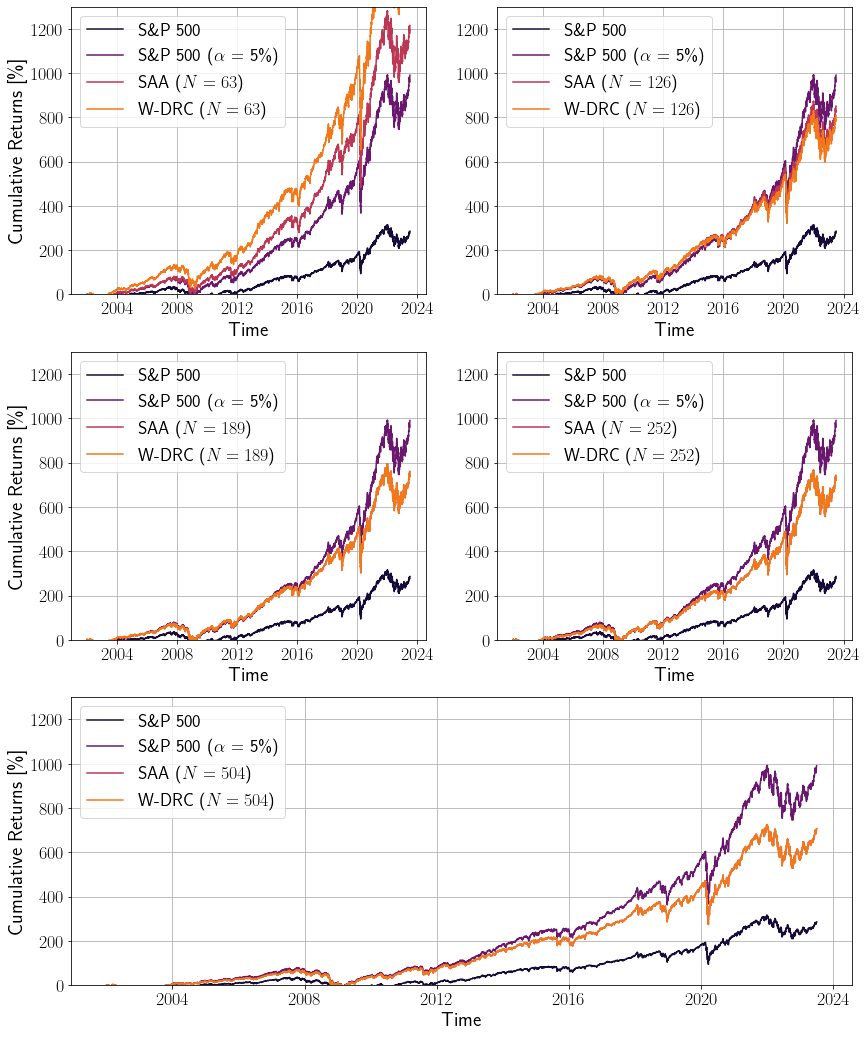

In [11]:
# Prepare plot settings
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Prepare plots using gridspec
fig = plt.figure(figsize=(14, 18))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1])

# plot [0,0]
TX = 0
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 0])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500'.format(alpha), color=myMap(0.1))
ax1.plot(compatableDates, cumulativeReturns[TX,:,1] , label=r'S\&P 500 ($\alpha$ = {}\%)'.format(alpha), color=myMap(0.3))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.set_ylim((0,1300))
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# plot [0,1]
TX = 1
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 1])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500'.format(alpha), color=myMap(0.1))
ax1.plot(compatableDates, cumulativeReturns[TX,:,1] , label=r'S\&P 500 ($\alpha$ = {}\%)'.format(alpha), color=myMap(0.3))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel("", fontsize=def_font_size+2)
ax1.set_ylim((0,1300))
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# plot [1,0]
TX = 2
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[1, 0])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500'.format(alpha), color=myMap(0.1))
ax1.plot(compatableDates, cumulativeReturns[TX,:,1] , label=r'S\&P 500 ($\alpha$ = {}\%)'.format(alpha), color=myMap(0.3))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.set_ylim((0,1300))
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# plot [1,1]
TX = 3
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[1, 1])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500'.format(alpha), color=myMap(0.1))
ax1.plot(compatableDates, cumulativeReturns[TX,:,1] , label=r'S\&P 500 ($\alpha$ = {}\%)'.format(alpha), color=myMap(0.3))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel("", fontsize=def_font_size+2)
ax1.set_ylim((0,1300))
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# plot [2,:]
TX = 4
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[2, :])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500'.format(alpha), color=myMap(0.1))
ax1.plot(compatableDates, cumulativeReturns[TX,:,1] , label=r'S\&P 500 ($\alpha$ = {}\%)'.format(alpha), color=myMap(0.3))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.set_ylim((0,1300))
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = f'Backtest_ITMDRO_Fig2_CUMULATIVE_ALL.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

Then we check a single plot relative to the benchmark.

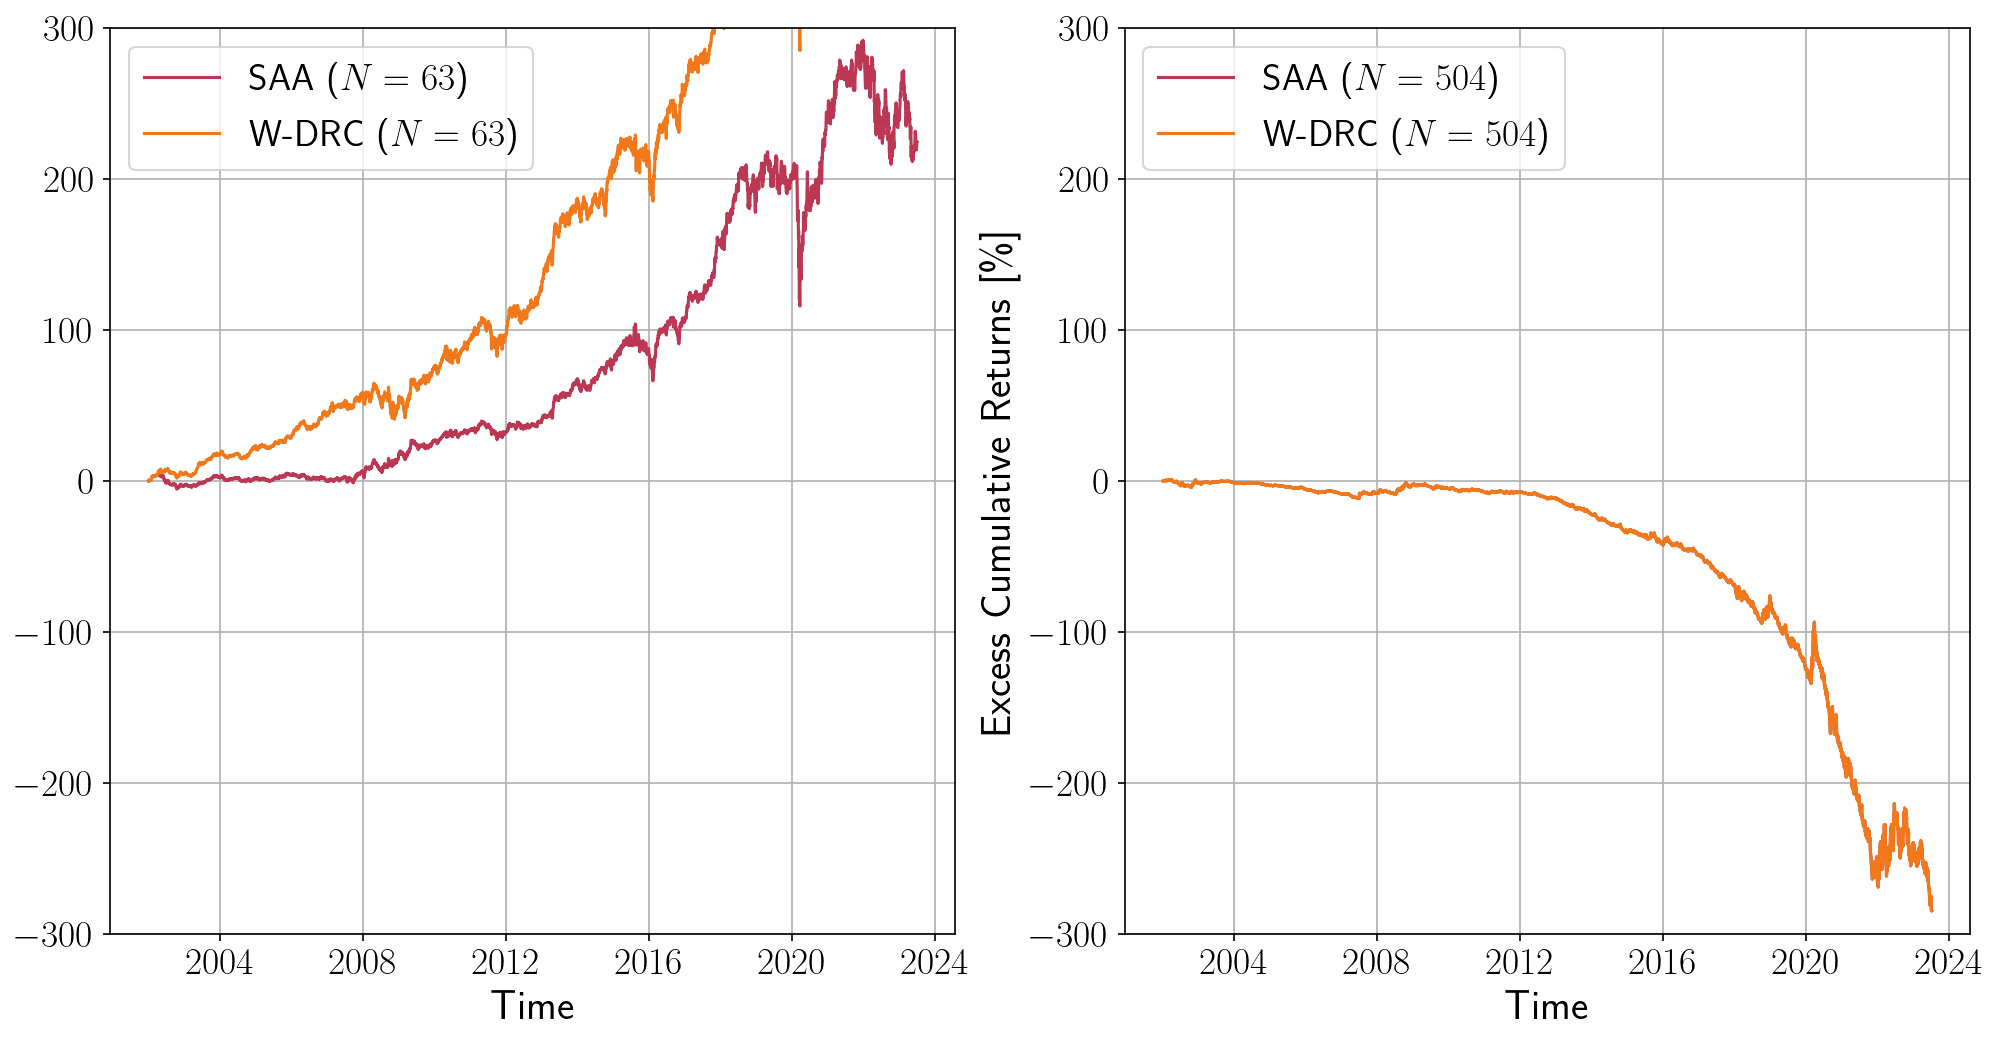

In [12]:
# Prepare plot settings
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Control settings
xlabel=r'Time'
ylabel=r'Excess Cumulative Returns [\%]'
legend_loc="upper left"

# Prepare plots using gridspec
fig = plt.figure(figsize=(16, 8), dpi=150)
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1, 1])

# Specify which sample size to plot for
TX = 0
selectedSize = trainingSizes[TX]

# Plot
ax1 = plt.subplot(gs[0, 0])
ax1.plot(compatableDates, excessResultsSAA[TX,:] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, excessResultsDRO[TX,:] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel("", fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)
ax1.set_ylim((-300,300))

# Plot
TX = 4
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 1])
ax1.plot(compatableDates, excessResultsSAA[TX,:] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, excessResultsDRO[TX,:] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)
ax1.set_ylim((-300,300))

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = f'Backtest_ITMDRO_Fig3_CUMULATIVE_RELATIVE_TWO.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

Then we can check them relative to the benchmark.

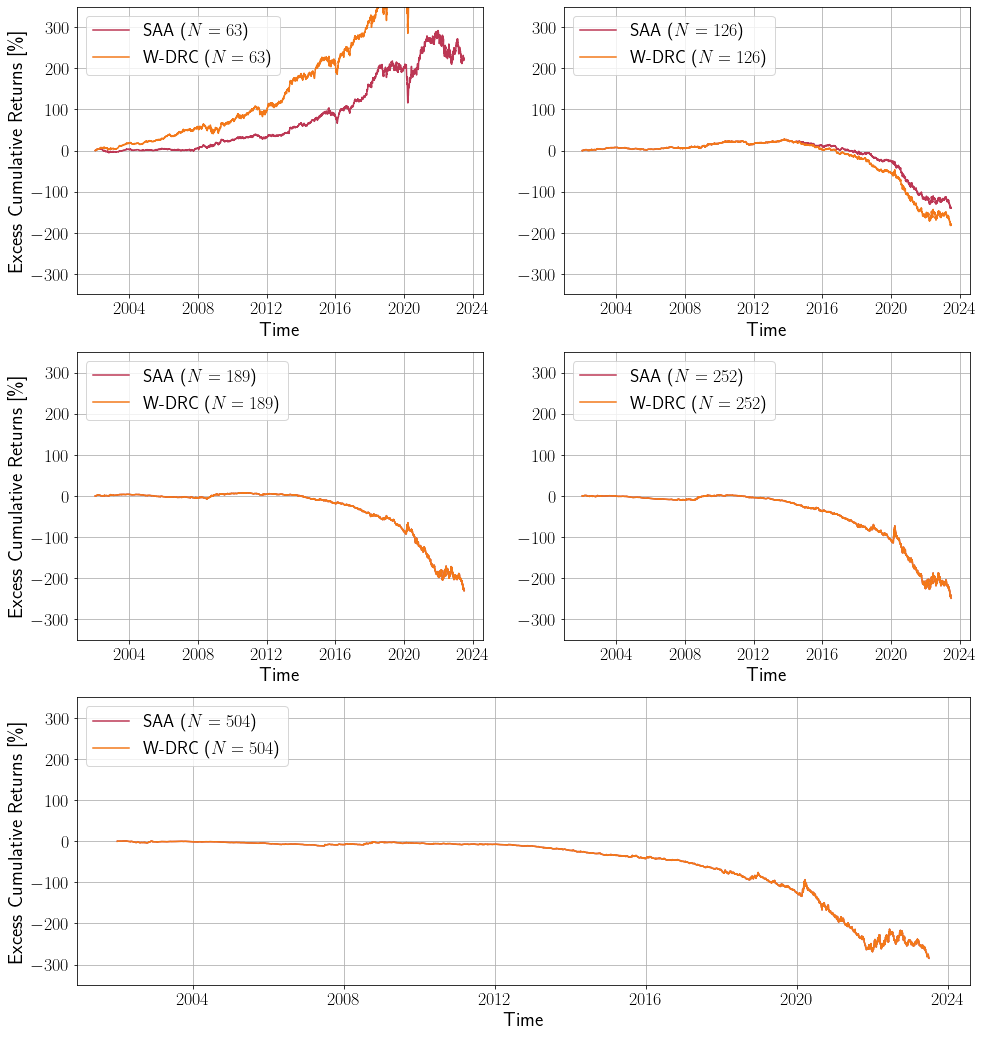

In [13]:
# Prepare plot settings
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

ylower = -350
yupper = 350

# Prepare plots using gridspec
fig = plt.figure(figsize=(16, 18))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1])

# plot [0,0]
TX = 0
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 0])
ax1.plot(compatableDates, excessResultsSAA[TX,:] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, excessResultsDRO[TX,:] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.set_ylim((ylower,yupper))
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# plot [0,1]
TX = 1
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 1])
ax1.plot(compatableDates, excessResultsSAA[TX,:] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, excessResultsDRO[TX,:] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel("", fontsize=def_font_size+2)
ax1.set_ylim((ylower,yupper))
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# plot [1,0]
TX = 2
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[1, 0])
ax1.plot(compatableDates, excessResultsSAA[TX,:] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, excessResultsDRO[TX,:] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.set_ylim((ylower,yupper))
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# plot [1,1]
TX = 3
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[1, 1])
ax1.plot(compatableDates, excessResultsSAA[TX,:] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, excessResultsDRO[TX,:] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel("", fontsize=def_font_size+2)
ax1.set_ylim((ylower,yupper))
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# plot [2,:]
TX = 4
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[2, :])
ax1.plot(compatableDates, excessResultsSAA[TX,:] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, excessResultsDRO[TX,:] , label=f'W-DRC ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.set_ylim((ylower,yupper))
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = f'Backtest_ITMDRO_Fig4_RELATIVE_ALL.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

Then we check them relative to each other.

### Plots of Selected Wasserstein Radii

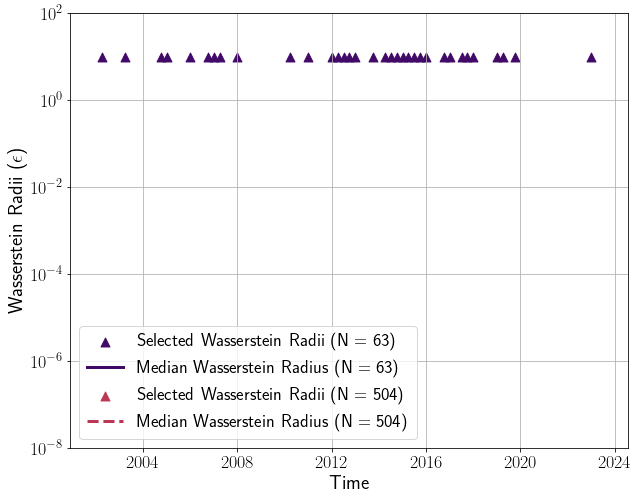

In [14]:
# Control settings
xlabel=r'Time'
ylabel=r'Wasserstein Radii ($\epsilon$)'
legend_loc="upper left"
def_font_size = 18

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
plt.rcParams.update({'font.size': def_font_size})
ax.scatter(rebalanceDates, epsOpt[0,:], marker='^', color=myMap(0.2), s=80, label="Selected Wasserstein Radii (N = 63)")
ax.axhline(y=np.median(epsOpt[0,:]), color=myMap(0.2), linestyle='-', linewidth=3, label='Median Wasserstein Radius (N = 63)')
ax.scatter(rebalanceDates, epsOpt[-1,:], marker='^', color=myMap(0.5), s=80, label="Selected Wasserstein Radii (N = 504)")
ax.axhline(y=np.median(epsOpt[-1,:]), color=myMap(0.5), linestyle='--', linewidth=3, label='Median Wasserstein Radius (N = 504)')


ax.set_xlabel(xlabel, fontsize=def_font_size+2)
ax.set_ylabel(ylabel, fontsize=def_font_size+2)
ax.set_yscale('log')
ax.legend()
ax.grid(True)
ax.set_ylim(10**(-8), 100)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = 'Backtest_ITMDRO_Fig5_WassersteinRadius_TWO.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

### Plots of In-Sample vs. Out-of-Sample

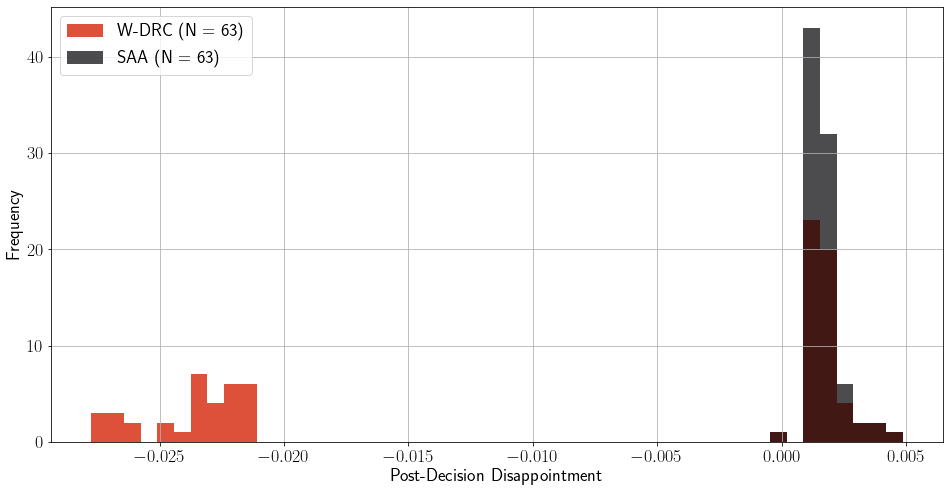

In [15]:
# Select data
IS_SAA_objective = IS_statistics[0,0,:,0]
OoS_SAA_objective = OoS_statistics[0,0,:,0]
IS_DRO_objective = IS_statistics[1,0,:,0]
OoS_DRO_objective = OoS_statistics[1,0,:,0]

# Instantiate plot
def_font_size = 18
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
plt.rcParams.update({'font.size': def_font_size})

# Plot histograms
#plt.hist(IS_SAA_objective, bins=30, alpha=0.5, label='IS SAA Objective', color='blue')
#plt.hist(OoS_SAA_objective, bins=30, alpha=0.5, label='OoS SAA Objective', color='green')
PDD_DRO = OoS_DRO_objective - IS_DRO_objective
PDD_SAA = OoS_SAA_objective - IS_SAA_objective
bin_edges = np.linspace(min(min(PDD_DRO), min(PDD_SAA)), max(max(PDD_DRO), max(PDD_SAA)), 50)  # 25 bins
plt.hist(PDD_DRO, bins=bin_edges, alpha=1, label='W-DRC (N = 63)', color=myMap(0.6))
plt.hist(PDD_SAA, bins=bin_edges, alpha=0.7, label='SAA (N = 63)', color=myMap(0.0))

# Add labels and legend
plt.xlabel('Post-Decision Disappointment')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = 'Backtest_ITMDRO_Fig6_Distributions_N63.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

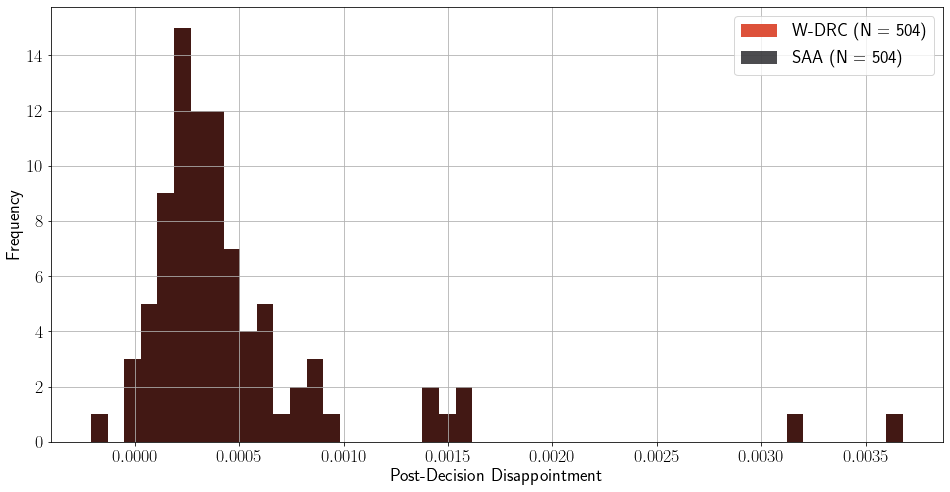

In [16]:
# Select data
IS_SAA_objective = IS_statistics[0,-1,:,0]
OoS_SAA_objective = OoS_statistics[0,-1,:,0]
IS_DRO_objective = IS_statistics[1,-1,:,0]
OoS_DRO_objective = OoS_statistics[1,-1,:,0]

# Instantiate plot
def_font_size = 18
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
plt.rcParams.update({'font.size': def_font_size})

# Plot histograms
#plt.hist(IS_SAA_objective, bins=30, alpha=0.5, label='IS SAA Objective', color='blue')
#plt.hist(OoS_SAA_objective, bins=30, alpha=0.5, label='OoS SAA Objective', color='green')
PDD_DRO = OoS_DRO_objective - IS_DRO_objective
PDD_SAA = OoS_SAA_objective - IS_SAA_objective
bin_edges = np.linspace(min(min(PDD_DRO), min(PDD_SAA)), max(max(PDD_DRO), max(PDD_SAA)), 50)  # 25 bins
plt.hist(PDD_DRO, bins=bin_edges, alpha=1, label='W-DRC (N = 504)', color=myMap(0.6))
plt.hist(PDD_SAA, bins=bin_edges, alpha=0.7, label='SAA (N = 504)', color=myMap(0.0))

# Add labels and legend
plt.xlabel('Post-Decision Disappointment')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = 'Backtest_ITMDRO_Fig7_Distributions_N504.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

But what is the true gain from using it? In absolute terms?

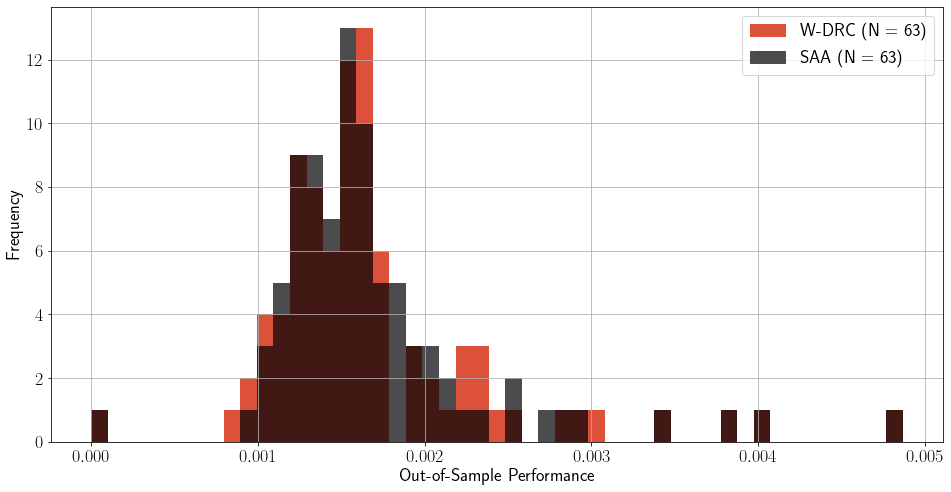

In [17]:
# Select training size
TX = 0
selectTrainingSize = trainingSizes[TX]

# Select data
IS_SAA_objective = IS_statistics[0,TX,:,0]
OoS_SAA_objective = OoS_statistics[0,TX,:,0]
IS_DRO_objective = IS_statistics[1,TX,:,0]
OoS_DRO_objective = OoS_statistics[1,TX,:,0]

# Instantiate plot
def_font_size = 18
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
plt.rcParams.update({'font.size': def_font_size})

# Plot histograms
PDD_DRO = OoS_DRO_objective
PDD_SAA = OoS_SAA_objective
bin_edges = np.linspace(min(min(PDD_DRO), min(PDD_SAA)), max(max(PDD_DRO), max(PDD_SAA)), 50)  # 25 bins
plt.hist(PDD_DRO, bins=bin_edges, alpha=1, label=f'W-DRC (N = {selectTrainingSize})', color=myMap(0.6))
plt.hist(PDD_SAA, bins=bin_edges, alpha=0.7, label=f'SAA (N = {selectTrainingSize})', color=myMap(0.0))

# Add labels and legend
plt.xlabel('Out-of-Sample Performance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = 'Backtest_ITMDRO_Fig8_StableReturns.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

### Violin Plots of Objective Terms

Let's look at the distribution of MAD.

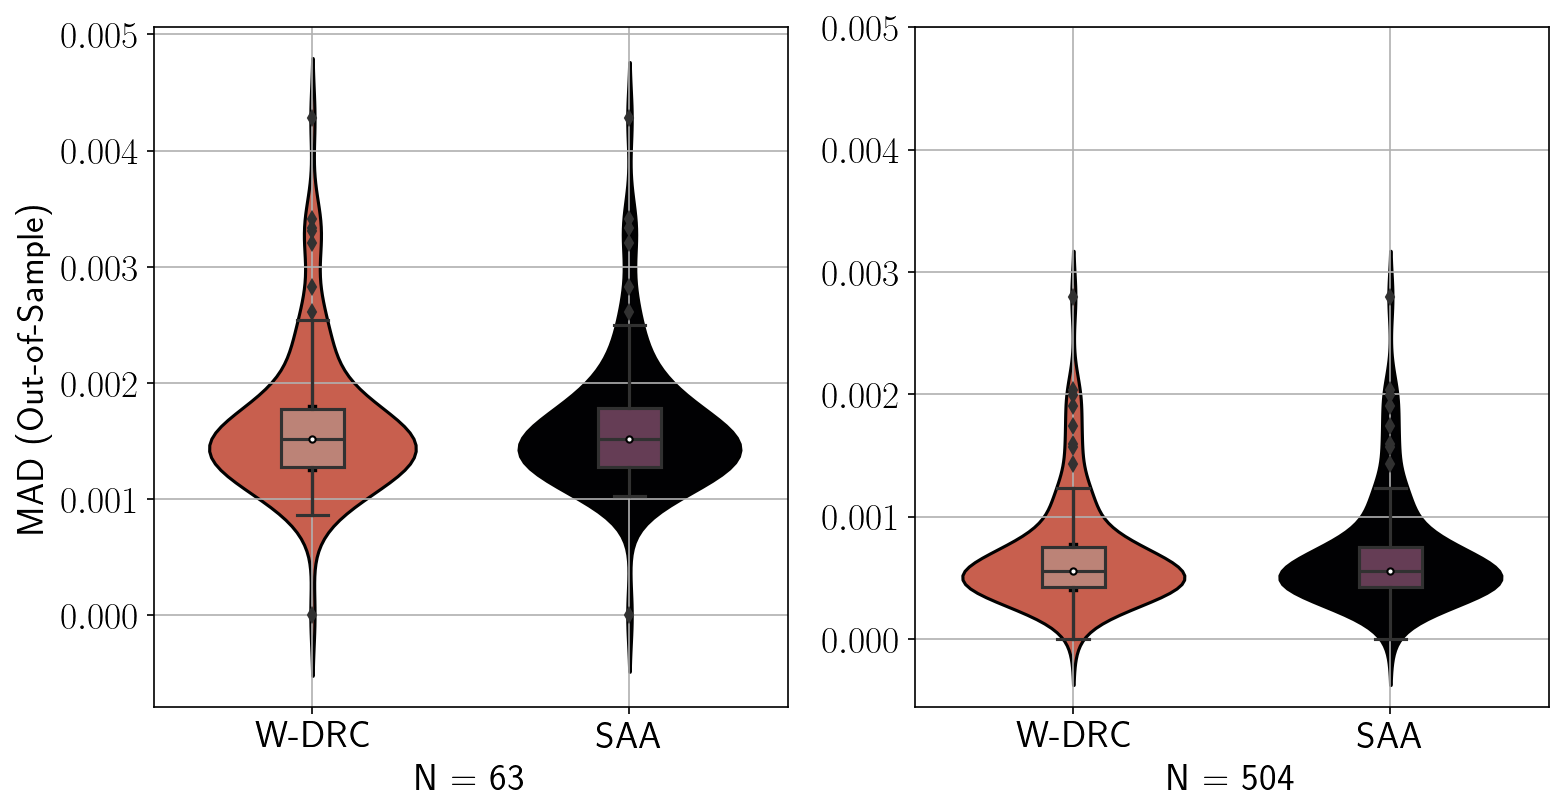

In [18]:
# Instantiate plot
def_font_size = 18
fig = plt.figure(figsize=(12, 6), dpi=150)
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot

# Specify tickers
y_tickers_1 = np.arange(0, 0.006, 0.001)
y_tickers_2 = np.arange(0, 0.006, 0.001)

TX1 = 0

# Sample data
statisticsIndex = 3 # MAD
IS_SAA_stats = IS_statistics[0, TX1, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX1, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX1, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX1, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'MAD': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='MAD', data=df, ax=ax1, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='MAD', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax1, saturation=0.40)

# Add labels and legend to the first subplot
ax1.set_xlabel(f'N = {trainingSizes[TX1]}')
ax1.set_ylabel('MAD (Out-of-Sample)')
ax1.grid(True)
ax1.set_yticks(y_tickers_1)

# Repeat for the second subplot (ax2) if needed
TX2 = -1

# Sample data
IS_SAA_stats = IS_statistics[0, TX2, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX2, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX2, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX2, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'MAD': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='MAD', data=df, ax=ax2, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='MAD', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax2, saturation=0.40)

# Add labels and legend to the first subplot
ax2.set_xlabel(f'N = {trainingSizes[TX2]}')
ax2.set_ylabel('')
ax2.grid(True)
ax2.set_yticks(y_tickers_2)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = f'Backtest_ITMDRO_Fig9_MAD_{trainingSizes[TX1]}{trainingSizes[TX2]}.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

Then we create a figure for the appendix where all of them are present.

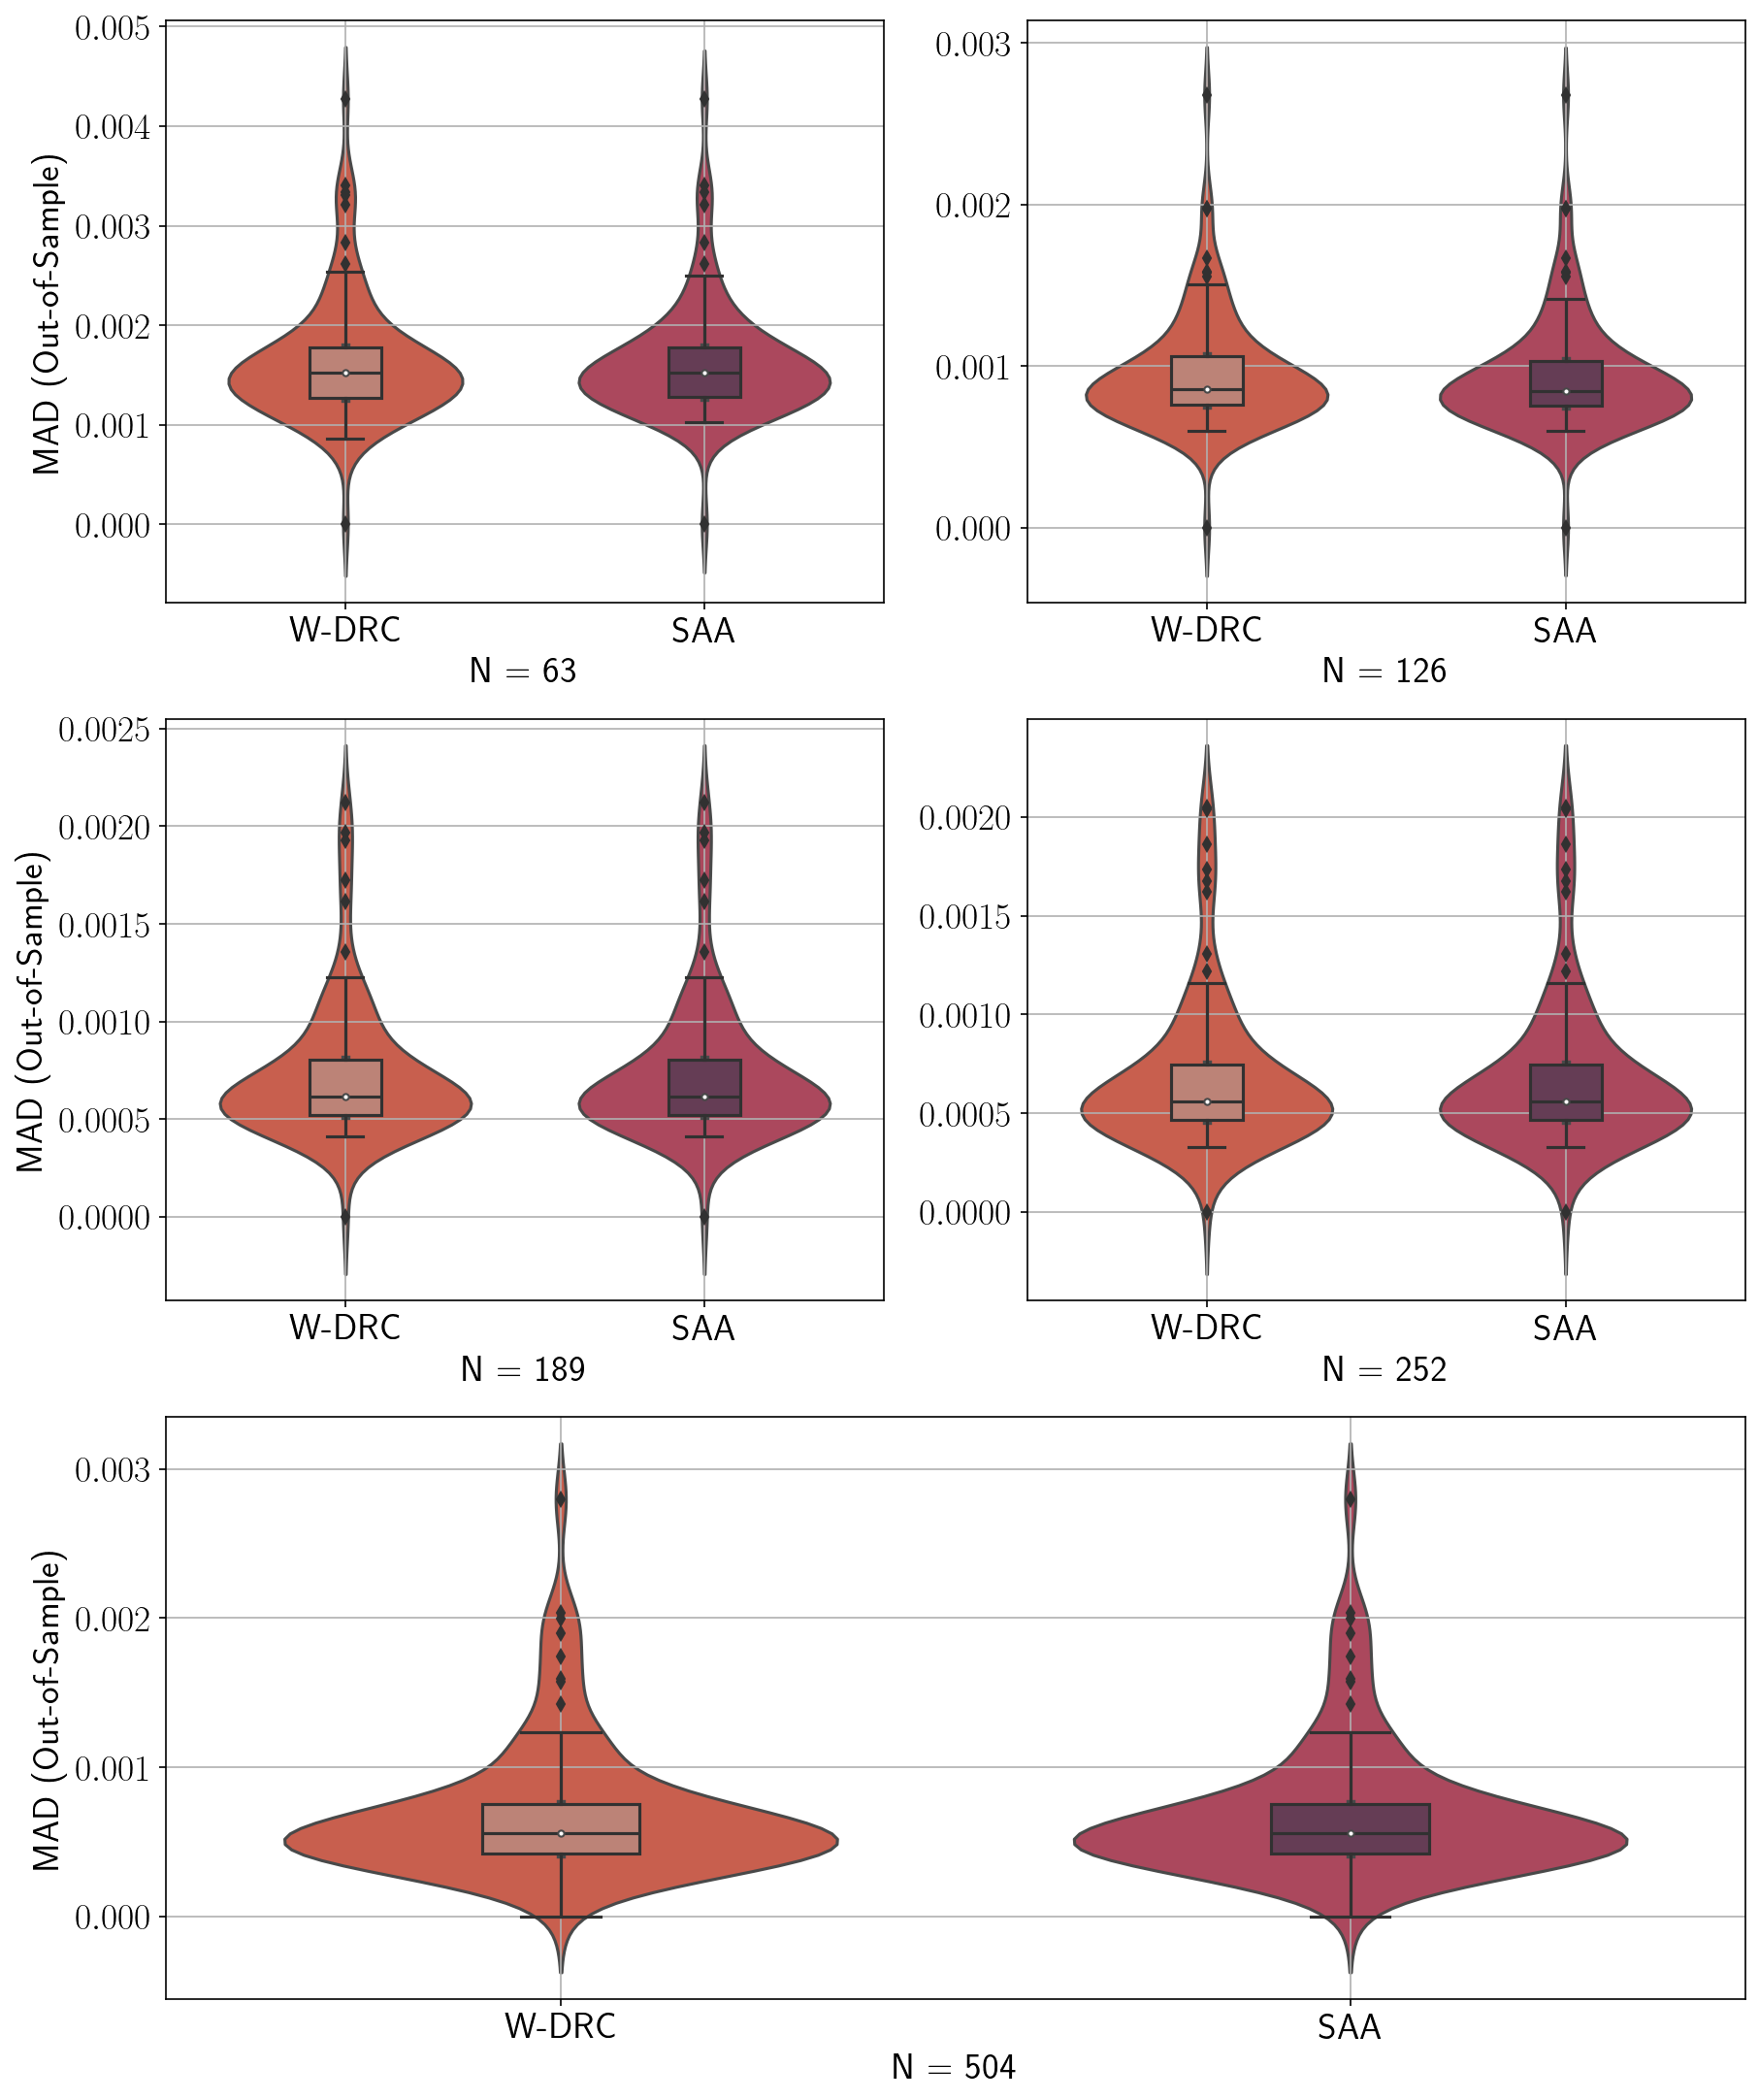

In [19]:
# Instantiate plot
def_font_size = 18
fig = plt.figure(figsize=(14, 18), dpi=150)
gs = gridspec.GridSpec(3, 2, height_ratios=[1,1,1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot
ax3 = fig.add_subplot(gs[1, 0])  # Third subplot
ax4 = fig.add_subplot(gs[1, 1])  # Fourth subplot
ax5 = fig.add_subplot(gs[2, :])  # Fifth subplot

# Select statistics
statisticsIndex = 3 # MAD


# ---- FIRST ----
TX = 0
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'MAD': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='MAD', data=df, ax=ax1, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='MAD', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax1, saturation=0.40)

# Add labels and legend to the first subplot
ax1.set_xlabel(f'N = {trainingSizes[TX]}')
ax1.set_ylabel('MAD (Out-of-Sample)')
ax1.grid(True)

# ---- SECOND ----
TX = 1
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'MAD': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='MAD', data=df, ax=ax2, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='MAD', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax2, saturation=0.40)

# Add labels and legend to the first subplot
ax2.set_xlabel(f'N = {trainingSizes[TX]}')
ax2.set_ylabel('')
ax2.grid(True)

# ---- THIRD ----
TX = 2
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'MAD': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='MAD', data=df, ax=ax3, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='MAD', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax3, saturation=0.40)

# Add labels and legend to the first subplot
ax3.set_xlabel(f'N = {trainingSizes[TX]}')
ax3.set_ylabel('MAD (Out-of-Sample)')
ax3.grid(True)

# ---- FOURTH ----
TX = 3
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'MAD': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='MAD', data=df, ax=ax4, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='MAD', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax4, saturation=0.40)

# Add labels and legend to the first subplot
ax4.set_xlabel(f'N = {trainingSizes[TX]}')
ax4.set_ylabel('')
ax4.grid(True)

# ---- FIFTH ----
TX = 4
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'MAD': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='MAD', data=df, ax=ax5, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='MAD', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax5, saturation=0.40)

# Add labels and legend to the first subplot
ax5.set_xlabel(f'N = {trainingSizes[TX]}')
ax5.set_ylabel('MAD (Out-of-Sample)')
ax5.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = f'Backtest_ITMDRO_Fig10_MAD_ALL.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

Then we look at our measure for CVaR.

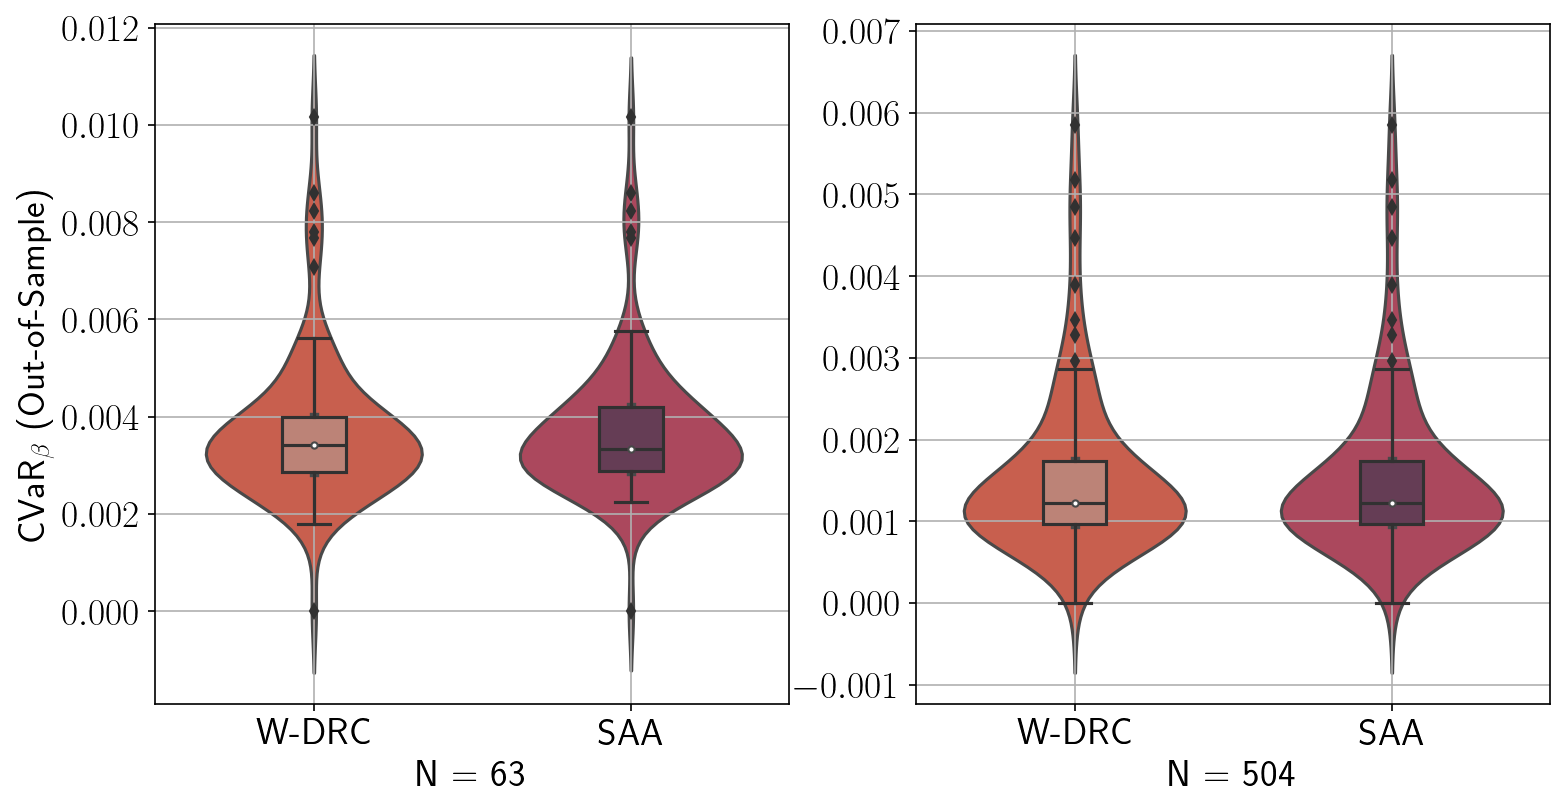

In [20]:
statisticsIndex = 13 # CVaR

# Instantiate plot
def_font_size = 18
fig = plt.figure(figsize=(12, 6), dpi=150)
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot

TX1 = 0

# Sample data
IS_SAA_stats = IS_statistics[0, TX1, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX1, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX1, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX1, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'CVaR': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='CVaR', data=df, ax=ax1, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='CVaR', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax1, saturation=0.40)

# Add labels and legend to the first subplot
ax1.set_xlabel(f'N = {trainingSizes[TX1]}')
ax1.set_ylabel(r'CVaR$_{\beta}$ (Out-of-Sample)')
ax1.grid(True)

# Repeat for the second subplot (ax2) if needed
TX2 = -1

# Sample data
IS_SAA_stats = IS_statistics[0, TX2, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX2, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX2, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX2, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'CVaR': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='CVaR', data=df, ax=ax2, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='CVaR', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax2, saturation=0.40)

# Add labels and legend to the first subplot
ax2.set_xlabel(f'N = {trainingSizes[TX2]}')
ax2.set_ylabel('')
ax2.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = f'Backtest_ITMDRO_Fig11_CVaR_{trainingSizes[TX1]}{trainingSizes[TX2]}.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

Then we make all of them in one plot for appendix.

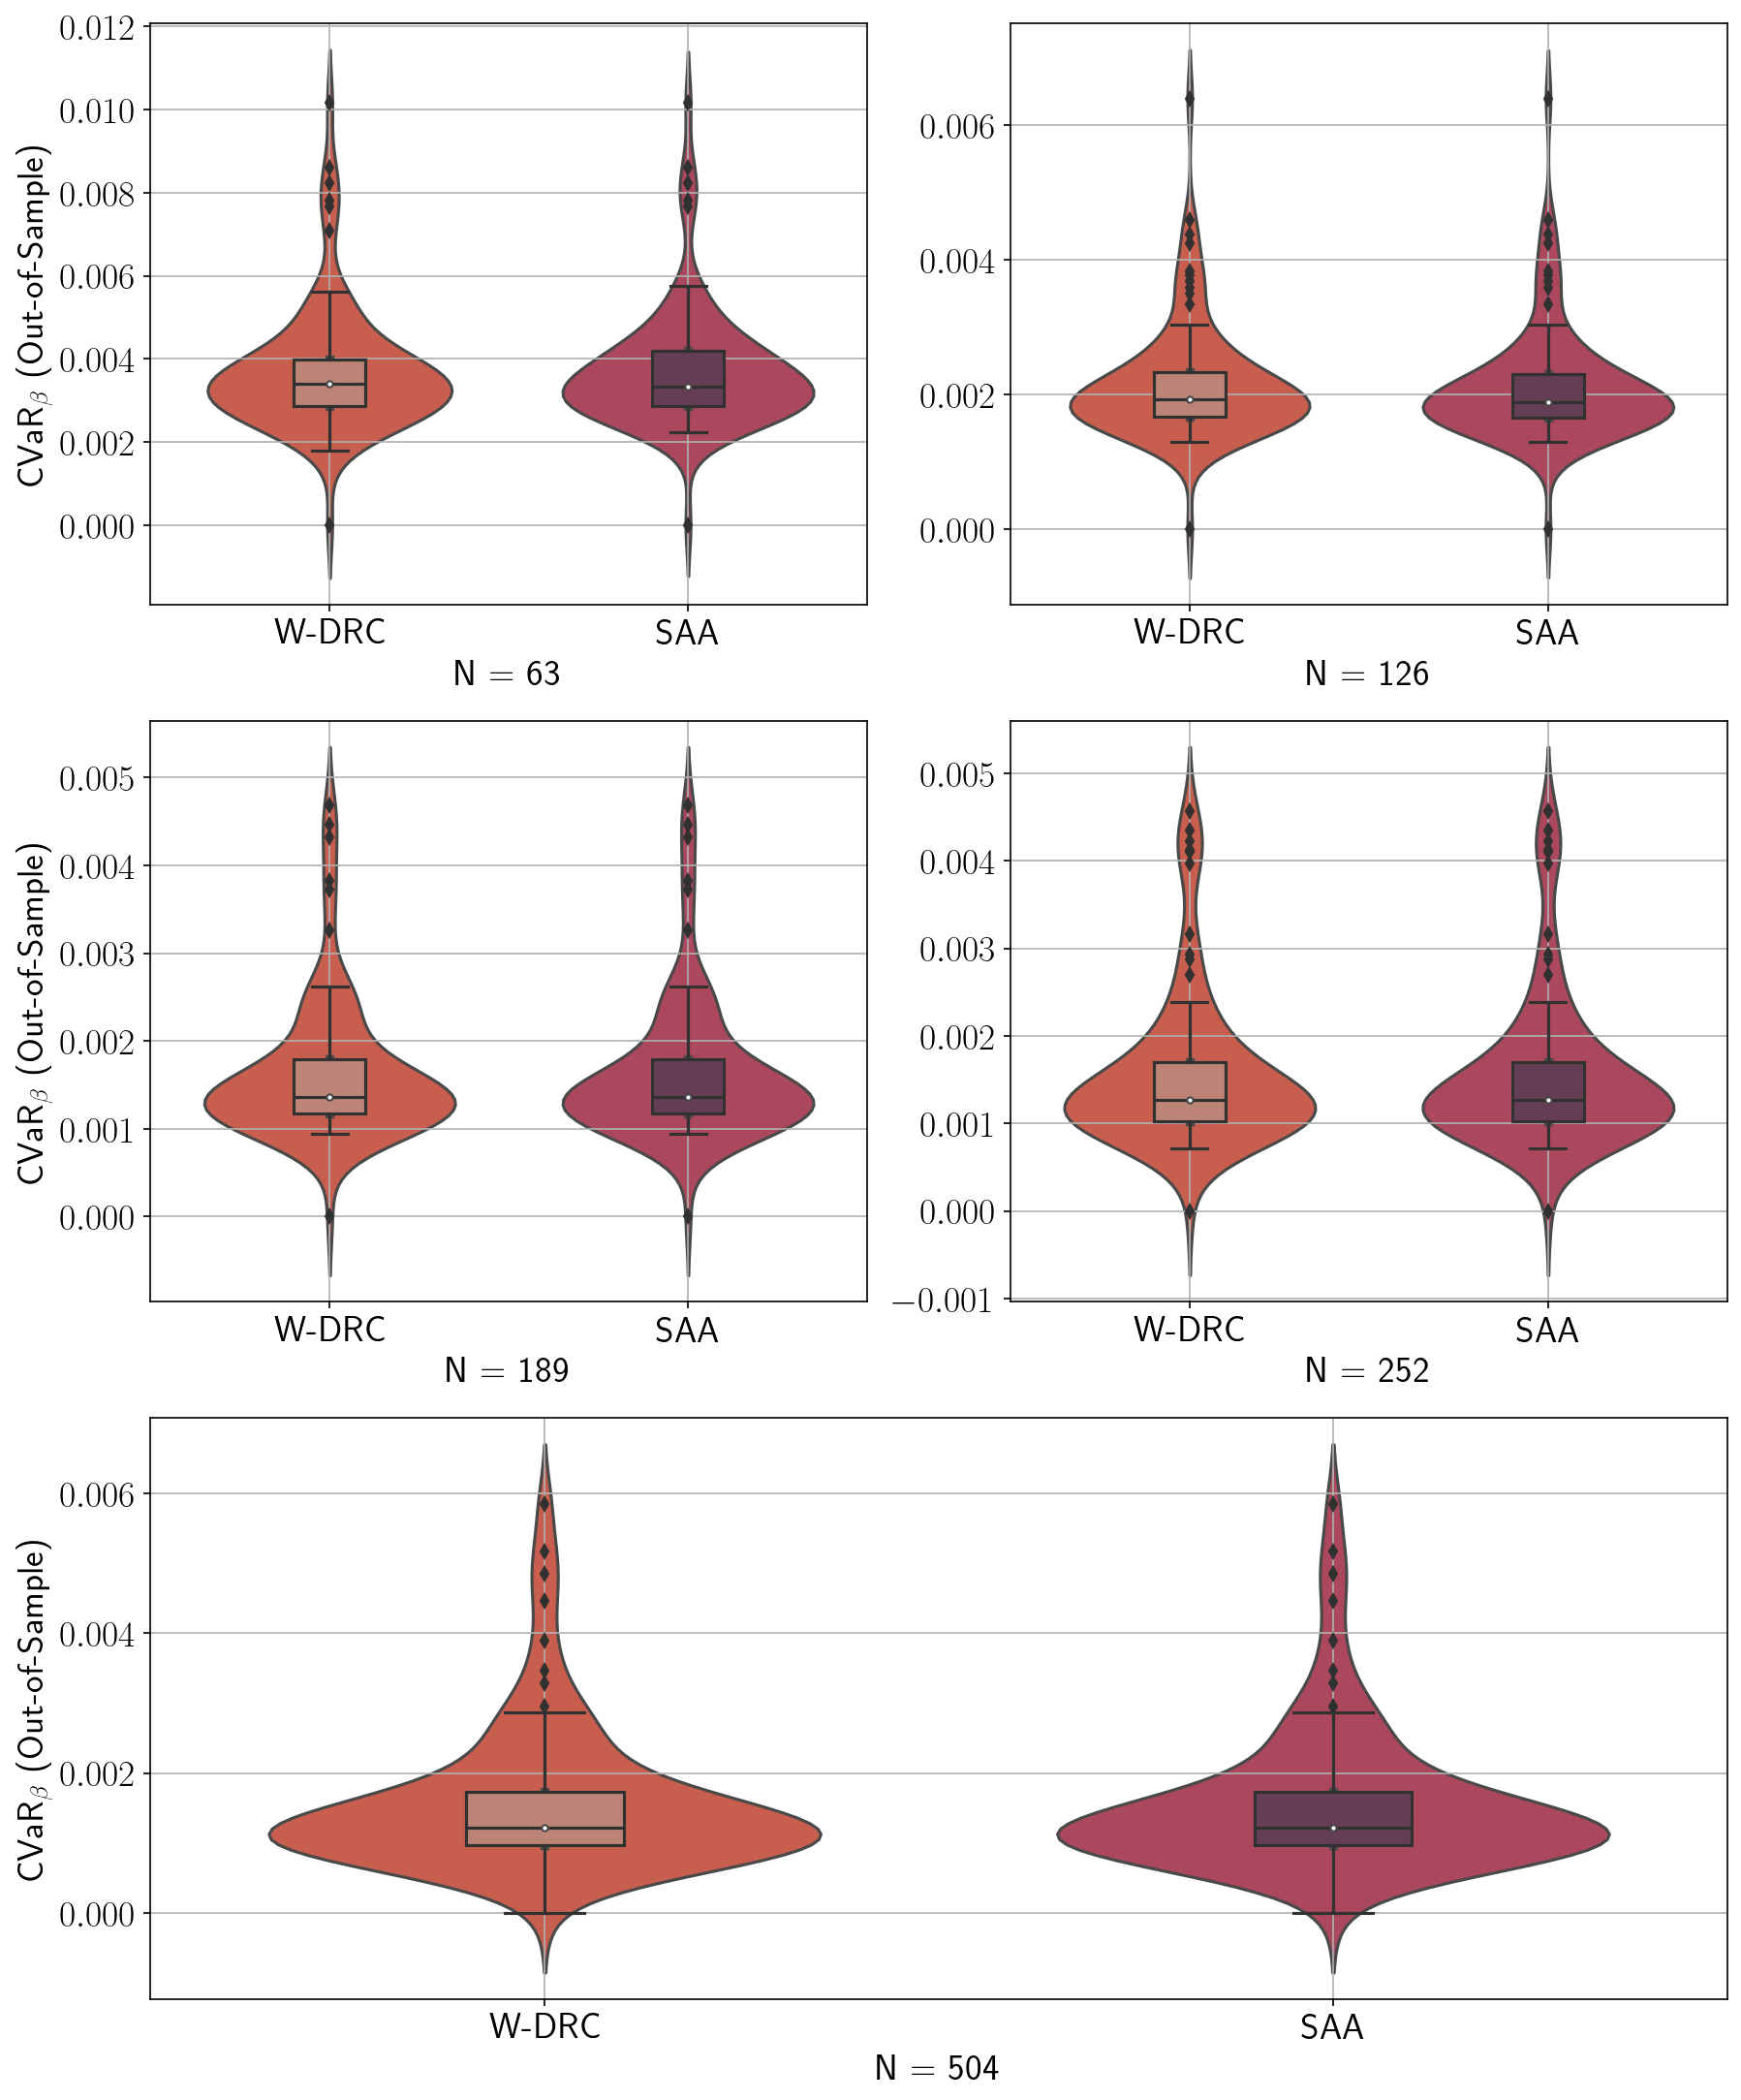

In [21]:
# Instantiate plot
def_font_size = 18
fig = plt.figure(figsize=(14, 18), dpi=150)
gs = gridspec.GridSpec(3, 2, height_ratios=[1,1,1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot
ax3 = fig.add_subplot(gs[1, 0])  # Third subplot
ax4 = fig.add_subplot(gs[1, 1])  # Fourth subplot
ax5 = fig.add_subplot(gs[2, :])  # Fifth subplot

# Select statistics
statisticsIndex = 13 # CVaR


# ---- FIRST ----
TX = 0
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'CVaR': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='CVaR', data=df, ax=ax1, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='CVaR', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax1, saturation=0.40)

# Add labels and legend to the first subplot
ax1.set_xlabel(f'N = {trainingSizes[TX]}')
ax1.set_ylabel(r'CVaR$_{\beta}$ (Out-of-Sample)')
ax1.grid(True)

# ---- SECOND ----
TX = 1
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'CVaR': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='CVaR', data=df, ax=ax2, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='CVaR', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax2, saturation=0.40)

# Add labels and legend to the first subplot
ax2.set_xlabel(f'N = {trainingSizes[TX]}')
ax2.set_ylabel('')
ax2.grid(True)

# ---- THIRD ----
TX = 2
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'CVaR': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='CVaR', data=df, ax=ax3, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='CVaR', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax3, saturation=0.40)

# Add labels and legend to the first subplot
ax3.set_xlabel(f'N = {trainingSizes[TX]}')
ax3.set_ylabel(r'CVaR$_{\beta}$ (Out-of-Sample)')
ax3.grid(True)

# ---- FOURTH ----
TX = 3
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'CVaR': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='CVaR', data=df, ax=ax4, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='CVaR', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax4, saturation=0.40)

# Add labels and legend to the first subplot
ax4.set_xlabel(f'N = {trainingSizes[TX]}')
ax4.set_ylabel('')
ax4.grid(True)

# ---- FIFTH ----
TX = 4
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['W-DRC'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'CVaR': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='CVaR', data=df, ax=ax5, palette=[myMap(0.6), myMap(0.5)], width=0.7, inner='box')
sns.boxplot(x='Models', y='CVaR', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax5, saturation=0.40)

# Add labels and legend to the first subplot
ax5.set_xlabel(f'N = {trainingSizes[TX]}')
ax5.set_ylabel(r'CVaR$_{\beta}$ (Out-of-Sample)')
ax5.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/ITM/"
fileName = f'Backtest_ITMDRO_Fig12_CVaR_ALL.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

### Statistics for Tables (Out-of-Sample)

The following show the code related to the statistics engine. The number corresponds to the index.

0. Objective
1.  DownsideSemiStandardDeviation
2. RMSE
3. MAD
4. VaR
5. CVaR
6. ExcessReturnAverage
7. ExcessReturn
8. SortinoIndex
9. BeatBenchmarkRatio
10. BeatBenchmarkExcess
11. BeatBenchmarkShortfall
12. BeatBenchmarkRewardRiskRatio
13. BeatBenchmarkShortfallRewardRiskRatio
14. MarketBeta
15. TotalReturn
16. AverageReturn
17. P5
18. P10
19. P90
20. P95

We start by printing the results for SAA.

In [22]:
SAAResult = np.mean(OoS_statistics[0,:,:,:], axis=1)
N = [63, 63*2, 63*3, 63*4, 63*8]

for i in range(SAAResult.shape[0]):
    TER = round(((1 + SAAResult[i, 7]/100)**4-1)*100, 2)
    MAD = round(SAAResult[i, 3], 4)
    RMSE = round(SAAResult[i, 2], 4)
    VaR_80 = round(-SAAResult[i, 4], 4)
    CVaR_80 = round(SAAResult[i, 5], 4)
    Beta = round(SAAResult[i, 14], 3)

    print(f"{N[i]} & {TER} & {MAD} & {RMSE} & {VaR_80} & {CVaR_80} & {Beta} \\\\")  # Add table row

63 & 0.94 & 0.0016 & 0.0021 & 0.0016 & 0.0028 & 0.989 \\
126 & -0.59 & 0.0009 & 0.0012 & 0.001 & 0.0017 & 0.988 \\
189 & -1.12 & 0.0007 & 0.0009 & 0.0008 & 0.0013 & 0.985 \\
252 & -1.26 & 0.0007 & 0.0009 & 0.0007 & 0.0012 & 0.984 \\
504 & -1.38 & 0.0007 & 0.0009 & 0.0008 & 0.0012 & 0.981 \\


Then we print the results for DRO.

In [23]:
DROResult = np.mean(OoS_statistics[1,:,:,:], axis=1)
N = [63, 63*2, 63*3, 63*4, 63*8]

for i in range(DROResult.shape[0]):
    TER = round(((1 + DROResult[i, 7]/100)**4-1)*100, 2)
    MAD = round(DROResult[i, 3], 4)
    RMSE = round(DROResult[i, 2], 4)
    VaR_80 = round(-DROResult[i, 4], 4)
    CVaR_80 = round(DROResult[i, 5], 4)
    Beta = round(DROResult[i, 14], 3)

    print(f"{N[i]} & {TER} & {MAD} & {RMSE} & {VaR_80} & {CVaR_80} & {Beta} \\\\")  # Add table row

63 & 2.0 & 0.0016 & 0.0021 & 0.0016 & 0.0028 & 0.995 \\
126 & -0.81 & 0.001 & 0.0012 & 0.001 & 0.0017 & 0.986 \\
189 & -1.12 & 0.0007 & 0.0009 & 0.0008 & 0.0013 & 0.985 \\
252 & -1.26 & 0.0007 & 0.0009 & 0.0007 & 0.0012 & 0.984 \\
504 & -1.38 & 0.0007 & 0.0009 & 0.0008 & 0.0012 & 0.981 \\


### Statistics for Tables (In-Sample)

In [24]:
SAAResult = np.mean(IS_statistics[0,:,:,:], axis=1)
N = [63, 63*2, 63*3, 63*4, 63*8]

for i in range(SAAResult.shape[0]):
    TER = round(((1 + SAAResult[i, 7]/100)**4-1)*100, 2)
    MAD = round(SAAResult[i, 3], 4)
    RMSE = round(SAAResult[i, 2], 4)
    VaR_80 = round(-SAAResult[i, 4], 4)
    CVaR_80 = round(SAAResult[i, 5], 4)
    Beta = round(SAAResult[i, 14], 3)

    print(f"{N[i]} & {TER} & {MAD} & {RMSE} & {VaR_80} & {CVaR_80} & {Beta} \\\\")  # Add table row

63 & -0.48 & 0.0003 & 0.0004 & 0.0003 & 0.0006 & 0.986 \\
126 & -0.73 & 0.0003 & 0.0005 & 0.0003 & 0.0007 & 0.984 \\
189 & -0.16 & 0.0004 & 0.0006 & 0.0004 & 0.0008 & 0.984 \\
252 & 2.14 & 0.0005 & 0.0007 & 0.0004 & 0.0009 & 0.983 \\
504 & 15.64 & 0.0007 & 0.001 & 0.0006 & 0.0014 & 0.976 \\


In [25]:
DROResult = np.mean(IS_statistics[1,:,:,:], axis=1)
N = [63, 63*2, 63*3, 63*4, 63*8]

for i in range(DROResult.shape[0]):
    TER = round(((1 + DROResult[i, 7]/100)**4-1)*100, 2)
    MAD = round(DROResult[i, 3], 4)
    RMSE = round(DROResult[i, 2], 4)
    VaR_80 = round(-DROResult[i, 4], 4)
    CVaR_80 = round(DROResult[i, 5], 4)
    Beta = round(DROResult[i, 14], 3)

    print(f"{N[i]} & {TER} & {MAD} & {RMSE} & {VaR_80} & {CVaR_80} & {Beta} \\\\")  # Add table row

63 & 1.24 & 0.0008 & 0.0011 & 0.0008 & 0.0014 & 0.998 \\
126 & -0.75 & 0.0004 & 0.0005 & 0.0003 & 0.0008 & 0.983 \\
189 & -0.16 & 0.0004 & 0.0006 & 0.0004 & 0.0008 & 0.984 \\
252 & 2.14 & 0.0005 & 0.0007 & 0.0004 & 0.0009 & 0.983 \\
504 & 15.64 & 0.0007 & 0.001 & 0.0006 & 0.0014 & 0.976 \\


### Plot of Number of Constituents During Each Rebalancing

We start by loading the data.

In [26]:
# Load out-of-sample statistics
fileNameOutOfSample = "Constituents.csv"
constituents = pd.read_csv(relativePath + fileNameOutOfSample)

Then we make the plot.

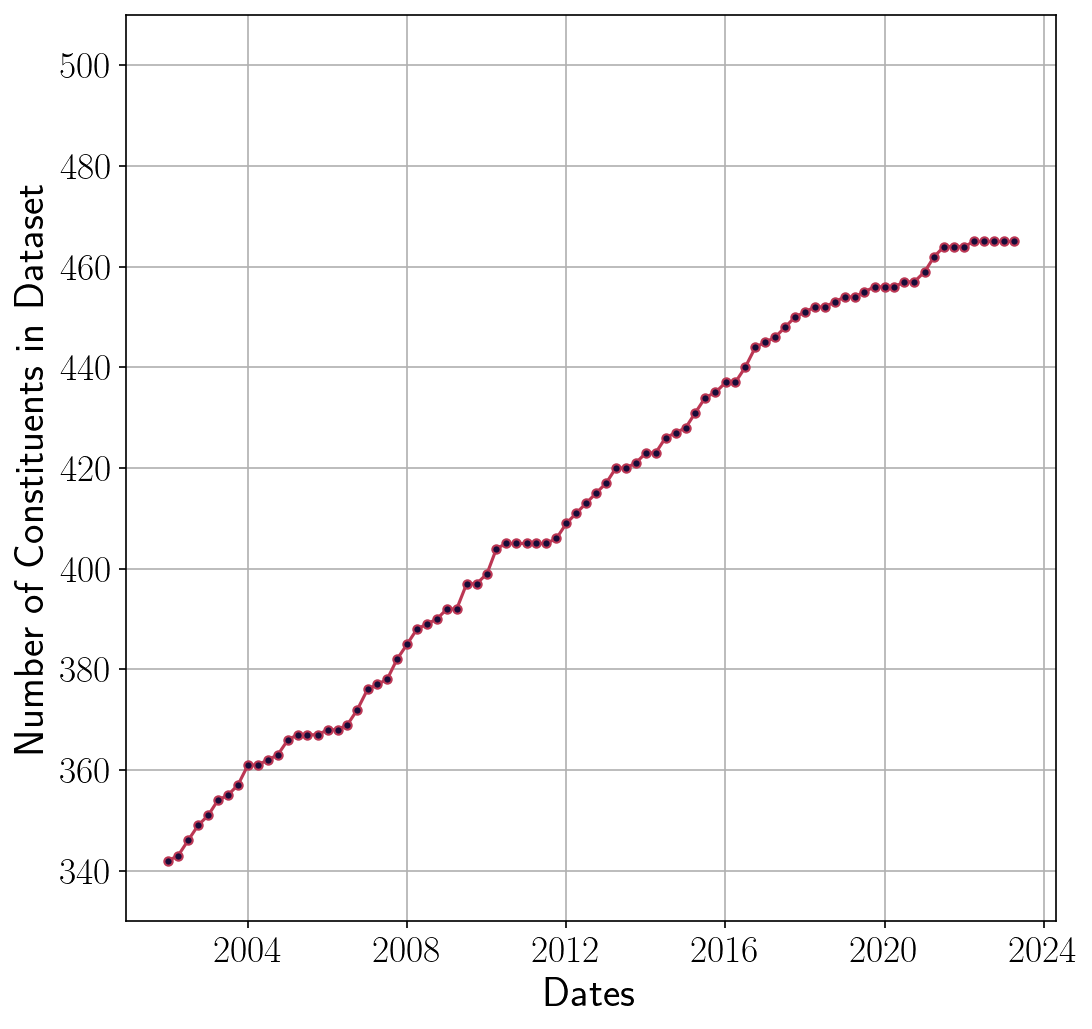

In [27]:
# Prepare plot settings
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Control settings
xlabel=r'Dates'
ylabel=r'Number of Constituents in Dataset'
legend_loc="upper left"

# Prepare plots using gridspec
fig = plt.figure(figsize=(8, 8), dpi=150)

# Plot
plt.plot(rebalanceDates[:-1], constituents['Constituents'], color=myMap(0.5), marker="o", markersize=4, markerfacecolor=myMap(0.1))
plt.xlabel(xlabel, fontsize=def_font_size+2)
plt.ylabel(ylabel, fontsize=def_font_size+2)
plt.grid(True)
plt.ylim((330,510))


# Save figure
relativePathPlots = "./ResultsPlots/Backtest/"
fileName = f'Backtest_CONSTITUENTS.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()